In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
PATH = os.path.join('..','..','data','train.csv')
train = pd.read_csv(PATH)
print(train.shape)
train.head()

(524164, 11)


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [3]:
train.iloc[:, 1:].describe()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


## Target

"BeatsPerMinute"

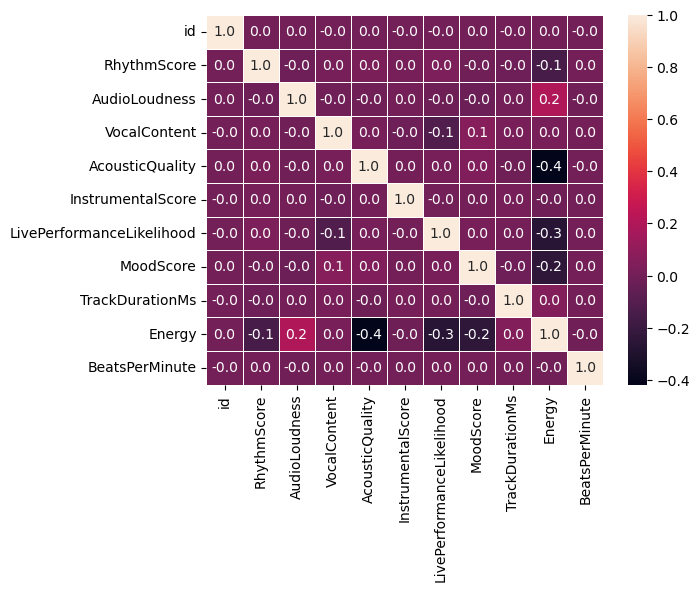

In [5]:
corr = train.corr()

heatmap = sns.heatmap(corr, annot=True, fmt='.1f', linewidth=.5)
plt.savefig('../deliver/real_features_corr.png',dpi=300, bbox_inches='tight')

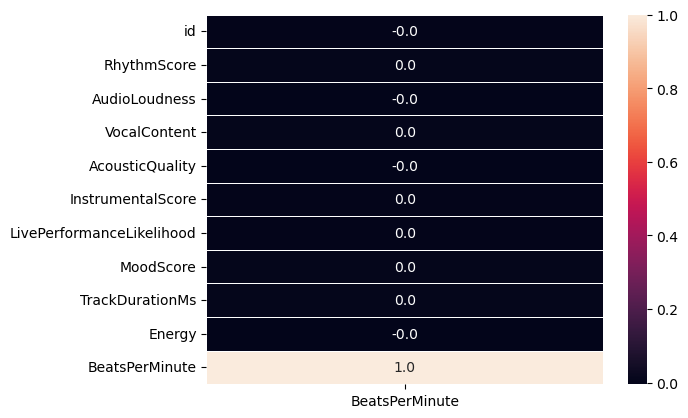

In [6]:

heatmap_bpm = sns.heatmap(corr.loc[['BeatsPerMinute']].T, annot=True, fmt='.1f',linewidth=.5)
plt.savefig('../deliver/real_bpm_features_corr.png', dpi=300, bbox_inches='tight')

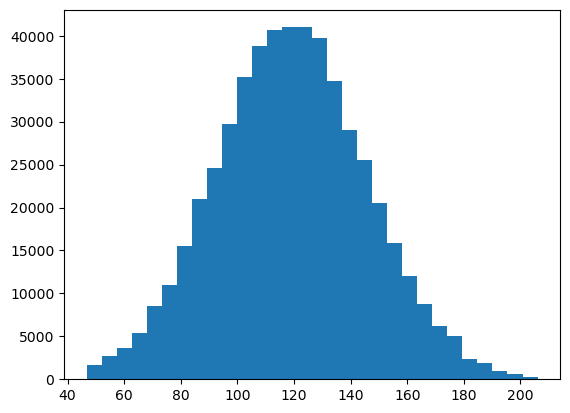

In [9]:
plt.hist(train['BeatsPerMinute'], bins=30)
plt.savefig('../deliver/real_bpm_distrib.png', dpi=300, bbox_inches='tight')

## EDA´s Conclusion

There isn´t any feature in the dataset that contains a linear correlation with the target "BeatsPerMinute'. To conclude, the best option is to use a non-linerar model to complete the challenge.

#### Type of my target

The variable BeatsPerMinute is a numeric-quantitative-discrete type. So, to predict this kind of target, it needs to use a regressior model.